In [1]:
import matplotlib.pyplot as plt
import torch

from diffusion.unet_model import Unet
from diffusion.ddim import DDIM
from diffusion.ddpm import DDPM

In [2]:
# set device to cpu or cuda or mps
if torch.backends.mps.is_available():
    device = torch.device('mps') 
    print("Device set to : mps")
elif(torch.cuda.is_available()): 
    device = torch.device('cuda:0') 
    torch.cuda.empty_cache()
    print("Device set to : " + str(torch.cuda.get_device_name(device)))
else:
    device = torch.device('cpu')
    print("Device set to : cpu")

Device set to : mps


In [3]:
beta_start = 1e-4
beta_end = 0.02
time_step = 500

In [4]:
unet = Unet(
    image_channels = 3, 
    down_channels  = [64, 128, 256, 512], 
    up_channels = [512, 256, 128, 64], 
    out_dim = 64, 
    time_emb_dim = 32, 
    context_dim = 18
   ).to(device)
unet.load_state_dict(torch.load('./weights/' + f"model_499.pth"))

<All keys matched successfully>

In [5]:
ddpm = DDPM(beta_start, beta_end, time_step, device)

In [6]:
ddim = DDIM(beta_start, beta_end, time_step, device)

In [7]:
ddpm_res = ddpm.sample(unet, 1, 64, 18, 350, 20)
ddpm_res.shape

(1, 18, 64, 64, 3)

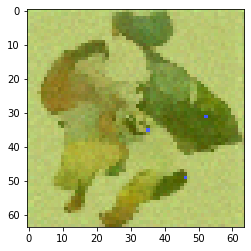

In [9]:
plt.imshow(ddpm_res[0][-1])

In [12]:
ddim_res = ddim.sample(unet, 1, 64, 18, 400, 10)
ddim_res.shape

(1, 41, 64, 64, 3)

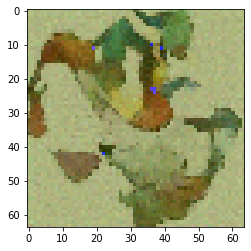

In [14]:
plt.imshow(ddim_res[0][-1])